In [39]:
!wget -O reddit_data_split.zip https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
!unzip -o reddit_data_split.zip

--2022-03-18 03:11:27--  https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
Resolving gla-my.sharepoint.com (gla-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to gla-my.sharepoint.com (gla-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip [following]
--2022-03-18 03:11:28--  https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip
Reusing existing connection to gla-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 468327 (457K) [application/x-zip-compressed]
Saving to: ‘reddit_data_split.zip’

reddit_data_split.z 100%[===================>] 457.35K   871KB/s    in 0.5s    

2022-03-18 03:11:29 (871 KB/s) - ‘reddit_data_split.zip’ saved [468327/468327]

Archive:  reddit_data_split.zip
  in

In [40]:
import json

with open('reddit_train.json') as f:
    train_data = json.load(f)
with open('reddit_val.json') as f:
    validation_data = json.load(f)
with open('reddit_test.json') as f:
    test_data = json.load(f)

print("Number of posts in training data:", len(train_data))
print("Number of posts in validation data:", len(validation_data))
print("Number of posts in test data:", len(test_data))

Number of posts in training data: 1200
Number of posts in validation data: 400
Number of posts in test data: 400


## **Comparing Classifiers**

### Exploring the dataset

In [41]:
import pandas as pd
import numpy as np
train_data= pd.DataFrame (train_data)
validation_data= pd.DataFrame (validation_data)
test_data= pd.DataFrame (test_data)

In [42]:
# exploring different columns in each dataframe

print("Training Data:",train_data.columns)
print("\nValidation Data:",validation_data.columns)
print("\nTest Data:",test_data.columns)

Training Data: Index(['subreddit', 'title', 'score', 'id', 'author', 'body'], dtype='object')

Validation Data: Index(['subreddit', 'title', 'score', 'id', 'author', 'body'], dtype='object')

Test Data: Index(['subreddit', 'title', 'score', 'id', 'author', 'body'], dtype='object')


In [43]:
# shape of the dataframes
print("Training Data:",train_data.shape)
print("\nValidation Data:",validation_data.shape)
print("\nTest Data:",test_data.shape)

Training Data: (1200, 6)

Validation Data: (400, 6)

Test Data: (400, 6)


In [44]:
train_data.subreddit.unique()


array(['PS4', 'pcgaming', 'NintendoSwitch', 'antiMLM', 'HydroHomies',
       'Coffee', 'xbox', 'Soda', 'tea'], dtype=object)

In [45]:
# top 10 rows of train dataframe
train_data.head(10)

,subreddit,title,score,id,author,body
0,PS4,Can I get banned for having a game that I didn...,0,queqfu,XC-XERZ,"Long story short, I saw ESO in my library, dow..."
1,pcgaming,How to get a Kinect sensor to work with a PC?,0,1eujoa,ZachTheKing,I have seen a video online where someone took ...
2,NintendoSwitch,Switch Only Charges with GoPro Cable,5,m00bx7,BluePenguin2002,"Hi, hope this is the right place/way to post t..."
3,antiMLM,L’Occitane going down MLM route?,15,q13pvx,100fluffyclouds,After buying a majority share in Limelight/Alc...
4,HydroHomies,Guys i need your help,2,rxiv2g,Epicskeleton53,Is it ok for me to drink coffee in the morning...
5,PS4,Ps4 is slowly dying and I am not sure what to do,7,qgnfue,just-a-ham,My PS4 is about 7 years old and about 2 weeks ...
6,HydroHomies,I'm a soda drinker repenting of my heathen ways,2,qlojyj,TheNonchalantZealot,...but I need a bit of help.\nAre there any re...
7,Coffee,How’s the Bar Keeper’s Friend Coffee cleaner?,20,mdfczd,carsknivesbeer,Has anyone tried it? I buy the regular BKF by ...
8,pcgaming,Is there a word for the thing where you go fro...,10,qlwmm3,InvertedReflexes,"Like I went from playing Skyrim on Medium, bou..."
9,xbox,Teredo Client,3,hzh0va,n0tjosh,Teredo Client hasn't been working properly for...


In [46]:
# top 10 rows of validation dataframe
validation_data.head(10)

,subreddit,title,score,id,author,body
0,Coffee,Reusable Nespresso Pods,3,j4d0i9,SaltyRob78,Hey there\nI want to go the reusable pod route...
1,HydroHomies,"Hydro News (sad) A city in US Michigan, Benton...",8,q6lb22,Kirinsdragon,I am not from the US and such news never reach...
2,Soda,Can’t find Sprite Zero Sugar Winter Spiced Cra...,2,rs0qmb,AnonymousPete23,Sprite released this limited edition soda for ...
3,tea,"I have a lot of teas, loose and in bags, that ...",11,egwnfh,T_as_in_Pterodactyl,"Long story short, I just have too many teas in..."
4,Coffee,Should I rinse bamboo filters before pour over?,0,pkxx4y,jack_hof,Having a hard time finding an answer to this w...
5,Coffee,How'd you get the hang of v60?,7,89nkeo,WowIsLoveWowIsLife,There have been many times that I've had taste...
6,PS4,Gta v keeps uninstalling,0,hk4u7j,greasydoor,Sometimes the game will randomly uninstall whe...
7,pcgaming,Why hasn't/Doesn't Nintendo partner with Steam...,0,nuknjj,Plus_Professor_1923,Obv this is a business synergy thing but every...
8,Coffee,Check out this new article on Coffee Farm Econ...,32,31io14,irishbarista,Interesting article on coffee farm economics b...
9,Coffee,1Zpresso K-pro vs K-Plus,7,i26spg,1067326,What is the main difference of these two grind...


In [47]:
# top 10 rows of test dataframe
test_data.head(10)

,subreddit,title,score,id,author,body
0,Coffee,Best Indie Coffee Brands that have K-Cups?,0,3s7usq,GrandRapidsCreative,I know most aren't the biggest fan of K-Cups a...
1,NintendoSwitch,How do you decide when to keep playing or when...,125,r8luun,windlep7,I know the obvious answer is to give up if you...
2,xbox,"So I’m relatively new on Xbox, and have a ques...",1,qwzis0,GoblinGuide93,I was playing infinite with friends in the par...
3,tea,Best gyokuro vendors in the US?,5,m1m3as,SocioDexter70,Ive only ever tried Ippodo since they have a U...
4,antiMLM,"My Mary Kay hun neighbor has a ""no soliciting""...",1038,pg5gs0,OkWallaby0009,I guess she doesn't like to be bothered by peo...
5,tea,Where to source pu'er from the early 90's?,5,pltrxl,SupremeCommander117,I have found lots of tea apparently from the e...
6,antiMLM,Are there any MLM’s that target men?,7,l9lzlq,jhococo,I’m curious! Where are the male huns? Or maybe...
7,Coffee,I modded my Hario Pro grinder to give it stepl...,12,rtt0x9,g4vr0che,I can't believe I didn't think about this soon...
8,pcgaming,Fanatical Sci-fi Mystery Bundle (Steam Keys) (...,0,n6epqx,minktravis65,STAR WARS Jedi Knight - Jedi Academy \nP5XCR-V...
9,Coffee,Confused: 1:2 ratio doesn't make sense for a d...,0,ky9hif,lifeisreallygoodnow,We are told that for an espresso use the 1:2 r...


In [48]:
# checking for null values in train dataframe
train_data.isna().sum()

subreddit    0
title        0
score        0
id           0
author       0
body         0
dtype: int64

In [49]:
# checking for null values in validation dataframe
validation_data.isna().sum()

subreddit    0
title        0
score        0
id           0
author       0
body         0
dtype: int64

In [50]:
# checking for null values in test dataframe
test_data.isna().sum()

subreddit    0
title        0
score        0
id           0
author       0
body         0
dtype: int64

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

def count_subreddit(dataset) :
  plt.figure(figsize=(15,10))
  print(dataset["subreddit"].value_counts())
  sns.countplot(data=dataset, x='subreddit')

tea               146
NintendoSwitch    145
PS4               142
Coffee            136
pcgaming          135
HydroHomies       134
xbox              132
antiMLM           128
Soda              102
Name: subreddit, dtype: int64


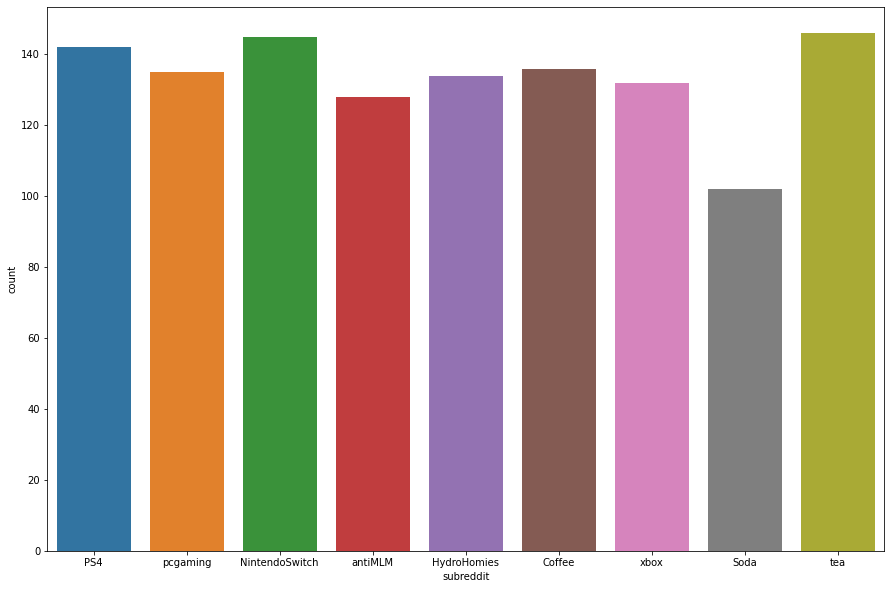

In [52]:
#Training data
count_subreddit(train_data)

antiMLM           54
NintendoSwitch    52
tea               48
Soda              43
PS4               43
pcgaming          43
Coffee            42
HydroHomies       38
xbox              37
Name: subreddit, dtype: int64


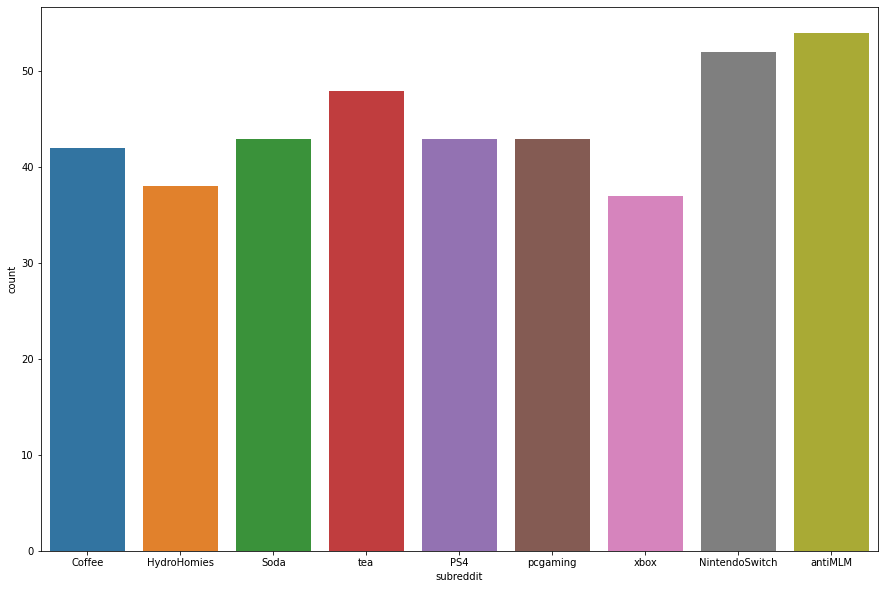

In [53]:
#Validation data
count_subreddit(validation_data)

Coffee            56
NintendoSwitch    52
PS4               48
pcgaming          47
xbox              44
antiMLM           44
tea               42
HydroHomies       38
Soda              29
Name: subreddit, dtype: int64


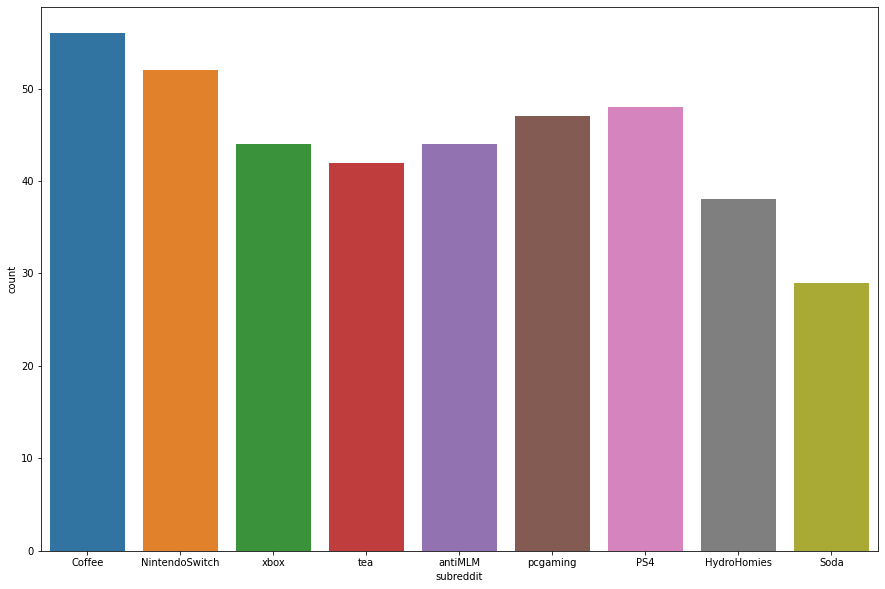

In [54]:
#Test data
count_subreddit(test_data)

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_data['subreddit'])
train_data['label'] = le.transform(train_data['subreddit'])
validation_data['label'] = le.transform(validation_data['subreddit'])
test_data['label'] = le.transform(test_data['subreddit'])

7    146
2    145
3    142
0    136
6    135
1    134
8    132
5    128
4    102
Name: label, dtype: int64


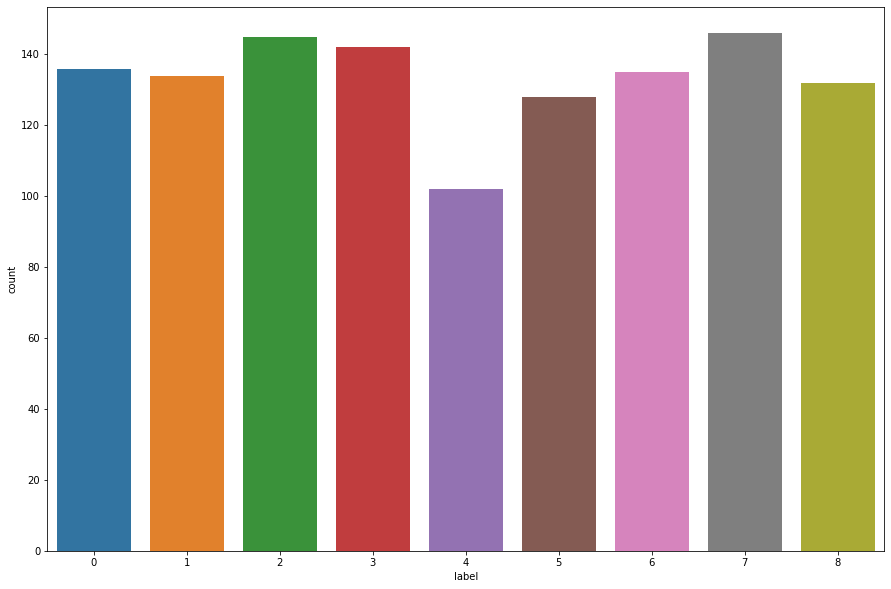

In [56]:
# A new label is added where I have used LabelEncoder to change the label into numerical values
print(train_data["label"].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='label')

**Importing libraries for NLP**

In [57]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('parser')
nlp.remove_pipe('tagger')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
# Function to get output using NLP
port_stem = PorterStemmer()
stop_words = stopwords.words('english')
def output_nlp(dataset):
  output = []
  for i in range(len(dataset)):
    words_norm = re.sub('[^a-zA-Z]', ' ', dataset.body[i])
    words_norm = words_norm.lower()
    words_norm = words_norm.split()
    words_norm = [port_stem.stem(word) for word in words_norm if not word in set(stop_words)]
    words_norm = ' '.join(words_norm)
    output.append(words_norm)

  return output

In [59]:
train_output = output_nlp(train_data)
validation_output= output_nlp(validation_data)
test_output = output_nlp(test_data)

In [60]:
cv = CountVectorizer()

features_train = cv.fit_transform(train_output).toarray()
features_validation = cv.transform(validation_output).toarray()
features_test = cv.transform(test_output).toarray()

**Importing libraries for model evaluation**

In [61]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [62]:
#Function for model evaluation using macros/weighted precision, recall and f1 score
def model_evaluation(model, true, predicted):

  print("\nModel: ", model, end='\n')

  accuracy = accuracy_score(predicted, true)
  weighted_precision = precision_score(predicted, true, average='weighted')
  weighted_recall = recall_score(predicted, true, average='weighted')
  weighted_f1 = fbeta_score(predicted, true, average='weighted', beta=1)

  print("Precision = %0.3f \t Recall = %0.3f \t F1 score = %0.3f" % (weighted_precision, weighted_recall, weighted_f1))
  report_classification = classification_report(predicted , true, digits=3, zero_division = 0, output_dict=True)
  matrix_confusion = confusion_matrix(true, predicted)

  print(report_classification)
  print("\n")
  print('\nConfusion matrix:\n', matrix_confusion)

  return ([accuracy, weighted_precision, weighted_recall, weighted_f1], report_classification)


In [63]:
label_train=train_data["label"]
label_validation=validation_data["label"]
label_test=test_data["label"]

# Classifier Models

**Dummy Classifier with strategy="most_frequent"**

In [64]:
mostfrequent_dummyprior = DummyClassifier(strategy="most_frequent")
mostfrequent_dummyprior.fit(features_train, label_train)
mostfrequent_dummyprior_train = model_evaluation(model="Dummy Prior Most Frequent Train", true=label_train, predicted=mostfrequent_dummyprior.predict(features_train))
print("\n")
mostfrequent_dummyprior_test = model_evaluation(model="Dummy Prior Most Frequent Test", true=label_test, predicted=mostfrequent_dummyprior.predict(features_test))


Model:  Dummy Prior Most Frequent Train
Precision = 1.000 	 Recall = 0.122 	 F1 score = 0.217
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '7': {'precision': 1.0, 'recall': 0.12166666666666667, 'f1-score': 0.2169390787518574, 'support': 1200}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'accuracy': 0.12166666666666667, 'macro avg': {'precision': 0.1111111111111111, 'recall': 0.01351851851851852, 'f1-score': 0.02410434208353971, 'support': 1200}, 'weighted avg': {'precision': 1.0, 'recall': 0.12166666666666667, 'f1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Dummy Classifier with strategy="stratified"**

In [65]:
stratified_dummyprior = DummyClassifier(strategy="stratified")
stratified_dummyprior.fit(features_train, label_train)
stratified_dummyprior_train = model_evaluation(model="Dummy Prior Stratified Train", true=label_train, predicted=stratified_dummyprior.predict(features_train))
print("\n")
stratified_dummyprior_test = model_evaluation(model="Dummy Prior Stratified Test", true=label_test, predicted=stratified_dummyprior.predict(features_test))


Model:  Dummy Prior Stratified Train
Precision = 0.107 	 Recall = 0.107 	 F1 score = 0.107
{'0': {'precision': 0.09558823529411764, 'recall': 0.10655737704918032, 'f1-score': 0.1007751937984496, 'support': 122}, '1': {'precision': 0.12686567164179105, 'recall': 0.11486486486486487, 'f1-score': 0.12056737588652482, 'support': 148}, '2': {'precision': 0.09655172413793103, 'recall': 0.0958904109589041, 'f1-score': 0.09621993127147765, 'support': 146}, '3': {'precision': 0.08450704225352113, 'recall': 0.08571428571428572, 'f1-score': 0.0851063829787234, 'support': 140}, '4': {'precision': 0.11764705882352941, 'recall': 0.11650485436893204, 'f1-score': 0.11707317073170732, 'support': 103}, '5': {'precision': 0.09375, 'recall': 0.08888888888888889, 'f1-score': 0.09125475285171102, 'support': 135}, '6': {'precision': 0.05925925925925926, 'recall': 0.05970149253731343, 'f1-score': 0.05947955390334572, 'support': 134}, '7': {'precision': 0.15753424657534246, 'recall': 0.16666666666666666, 'f1-

**LogisticRegression with One-hot vectorization**

In [66]:
enc = OneHotEncoder(handle_unknown = 'ignore')
train_features_enc=enc.fit(features_train)
test_features_enc=enc.transform(features_test)
logistic_reg = LogisticRegression(solver='saga')
logistic_reg.fit(features_train, label_train)
logistic_reg_train = model_evaluation(model="Logistic Regression With One-Hot Vectorization", predicted=logistic_reg.predict(features_train), true=label_train)
print("\n")
logistic_reg_test = model_evaluation(model="Logistic regression With One-Hot Vectorization", predicted=logistic_reg.predict(features_test), true=label_test)


Model:  Logistic Regression With One-Hot Vectorization
Precision = 0.959 	 Recall = 0.958 	 F1 score = 0.958
{'0': {'precision': 0.9779411764705882, 'recall': 0.9851851851851852, 'f1-score': 0.981549815498155, 'support': 135}, '1': {'precision': 0.9925373134328358, 'recall': 0.9300699300699301, 'f1-score': 0.96028880866426, 'support': 143}, '2': {'precision': 0.9517241379310345, 'recall': 0.9928057553956835, 'f1-score': 0.9718309859154929, 'support': 139}, '3': {'precision': 0.9507042253521126, 'recall': 0.9, 'f1-score': 0.9246575342465754, 'support': 150}, '4': {'precision': 0.9411764705882353, 'recall': 0.9411764705882353, 'f1-score': 0.9411764705882353, 'support': 102}, '5': {'precision': 0.9765625, 'recall': 0.9920634920634921, 'f1-score': 0.9842519685039369, 'support': 126}, '6': {'precision': 0.9629629629629629, 'recall': 0.9420289855072463, 'f1-score': 0.9523809523809523, 'support': 138}, '7': {'precision': 0.9657534246575342, 'recall': 0.9929577464788732, 'f1-score': 0.9791666

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


**LogisticRegression with TF-IDF vectorization (default settings)**

In [67]:
logistic_reg_tfid = LogisticRegression()
tfid_v = TfidfVectorizer()
train_features_tfid = tfid_v.fit_transform(train_data['body'])
test_features_tfid = tfid_v.transform(test_data['body'])
logistic_reg_tfid.fit(train_features_tfid, label_train)

logistic_reg_tfid_train = model_evaluation(model="Logistic Regression With TF-IDF Vectorization", predicted=logistic_reg_tfid.predict(train_features_tfid), true=label_train)
print("\n")
logistic_reg_tfid_test = model_evaluation(model="Logistic regression With TF-IDF Vectorization", predicted=logistic_reg_tfid.predict(test_features_tfid), true=label_test)


Model:  Logistic Regression With TF-IDF Vectorization
Precision = 0.993 	 Recall = 0.993 	 F1 score = 0.993
{'0': {'precision': 1.0, 'recall': 0.9927007299270073, 'f1-score': 0.9963369963369962, 'support': 137}, '1': {'precision': 0.9925373134328358, 'recall': 1.0, 'f1-score': 0.9962546816479401, 'support': 133}, '2': {'precision': 1.0, 'recall': 0.9863945578231292, 'f1-score': 0.9931506849315068, 'support': 147}, '3': {'precision': 0.9929577464788732, 'recall': 0.986013986013986, 'f1-score': 0.9894736842105264, 'support': 143}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 102}, '5': {'precision': 1.0, 'recall': 0.9770992366412213, 'f1-score': 0.9884169884169884, 'support': 131}, '6': {'precision': 0.9851851851851852, 'recall': 1.0, 'f1-score': 0.9925373134328358, 'support': 133}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 146}, '8': {'precision': 0.9696969696969697, 'recall': 1.0, 'f1-score': 0.9846153846153847, 'support': 128}, 'accuracy

**SVC Classifier with  One-hot vectorization (SVM with RBF kernel, default settings))**

In [68]:
enc = OneHotEncoder(handle_unknown = 'ignore')
train_features_enc=enc.fit(features_train)
test_features_enc=enc.transform(features_test)
s = SVC()
s.fit(features_train, label_train)

svc_train = model_evaluation(model="Support Vector With One-Hot Vectorization", predicted=s.predict(features_train), true=label_train)
print("\n")
svc_test = model_evaluation(model="Support Vector With One-Hot Vectorization", predicted=s.predict(features_test), true=label_test)


Model:  Support Vector With One-Hot Vectorization
Precision = 0.914 	 Recall = 0.907 	 F1 score = 0.902
{'0': {'precision': 0.9117647058823529, 'recall': 0.992, 'f1-score': 0.9501915708812262, 'support': 125}, '1': {'precision': 0.9626865671641791, 'recall': 0.9485294117647058, 'f1-score': 0.9555555555555555, 'support': 136}, '2': {'precision': 0.8551724137931035, 'recall': 1.0, 'f1-score': 0.9219330855018588, 'support': 124}, '3': {'precision': 0.9859154929577465, 'recall': 0.639269406392694, 'f1-score': 0.775623268698061, 'support': 219}, '4': {'precision': 0.9215686274509803, 'recall': 0.8245614035087719, 'f1-score': 0.8703703703703703, 'support': 114}, '5': {'precision': 0.921875, 'recall': 1.0, 'f1-score': 0.959349593495935, 'support': 118}, '6': {'precision': 0.837037037037037, 'recall': 0.9741379310344828, 'f1-score': 0.900398406374502, 'support': 116}, '7': {'precision': 0.910958904109589, 'recall': 1.0, 'f1-score': 0.953405017921147, 'support': 133}, '8': {'precision': 0.8560

**Creating dataframe for F1 score values for each classifier**

In [69]:
# Creating empty dictionary to store f1 score of each classifier
dummy_most_frequent_f1 = {}
dummy_stratified_f1 = {}
logistic_reg_f1 = {}
logistic_reg_tfid_f1 = {}
svc_f1 = {}

In [70]:
# Storing f1 scores for Dummy Classifier with strategy="most_frequent"
for i in mostfrequent_dummyprior_test[1]:
  if i == '0' or i == '1' or i == '2' or i == '3' or i == '4' or i == '5' or i == '6' or i == '7' or i == '8':
    dummy_most_frequent_f1[i] = mostfrequent_dummyprior_test[1][i]['f1-score']

In [71]:
# Storing f1 scores for Dummy Classifier with strategy="stratified"
for i in stratified_dummyprior_test[1]:
  if i == '0' or i == '1' or i == '2' or i == '3' or i == '4' or i == '5' or i == '6' or i == '7' or i == '8':
    dummy_stratified_f1[i] = stratified_dummyprior_test[1][i]['f1-score']

In [72]:
# Storing f1 scores for LogisticRegression with One-hot vectorization 
for i in logistic_reg_test[1]:
  if i == '0' or i == '1' or i == '2' or i == '3' or i == '4' or i == '5' or i == '6' or i == '7' or i == '8':
    logistic_reg_f1[i] = logistic_reg_test[1][i]['f1-score']

In [73]:
# Storing f1 scores for LogisticRegression with TF-IDF vectorization
for i in logistic_reg_tfid_test[1]:
  if i == '0' or i == '1' or i == '2' or i == '3' or i == '4' or i == '5' or i == '6' or i == '7' or i == '8':
    logistic_reg_tfid_f1[i] = logistic_reg_tfid_test[1][i]['f1-score']

In [74]:
# Storing f1 scores for SVC Classifier with  One-hot vectorization
for i in svc_test[1]:
  if i == '0' or i == '1' or i == '2' or i == '3' or i == '4' or i == '5' or i == '6' or i == '7' or i == '8':
    svc_f1[i] = svc_test[1][i]['f1-score']

In [75]:
#creating dataframe for f1 scores for classifiers according to label
row = ["Coffee", "NintendoSwitch", "xbox", "tea", "antiMLM", "pcgaming", "PS4", "HydroHomies", "Soda"]
column = ["Dummy = Most Frequent", "Dummy = Stratified", "LogisticRegression with One-hot vectorization ", "LogisticRegression with TF-IDF vectorization", "SVC"]

In [76]:
f1_df = pd.DataFrame.from_dict(
    [
     dummy_most_frequent_f1, 
     dummy_stratified_f1, 
     logistic_reg_f1, 
     logistic_reg_tfid_f1,
     svc_f1
    ]).T
f1_df.columns=column
f1_df.index=row

In [77]:
f1_df

,Dummy = Most Frequent,Dummy = Stratified,LogisticRegression with One-hot vectorization,LogisticRegression with TF-IDF vectorization,SVC
Coffee,0.000000,0.079208,0.909091,0.910714,0.831683
NintendoSwitch,0.000000,0.071429,0.871795,0.845070,0.876712
xbox,0.000000,0.115385,0.770833,0.738739,0.725490
tea,0.000000,0.163265,0.634615,0.616822,0.496552
antiMLM,0.000000,0.098361,0.718750,0.838710,0.753623
pcgaming,0.000000,0.000000,0.776471,0.827586,0.595745
PS4,0.000000,0.085106,0.602151,0.620690,0.434783
HydroHomies,0.190045,0.111111,0.891566,0.891566,0.853333
Soda,0.000000,0.170213,0.689655,0.725000,0.638889


**In most cases Logistic Regression with TF-IDF vectorization classifier is performing better**

Text(0.5, 1.0, 'LogisticRegression with TF-IDF')

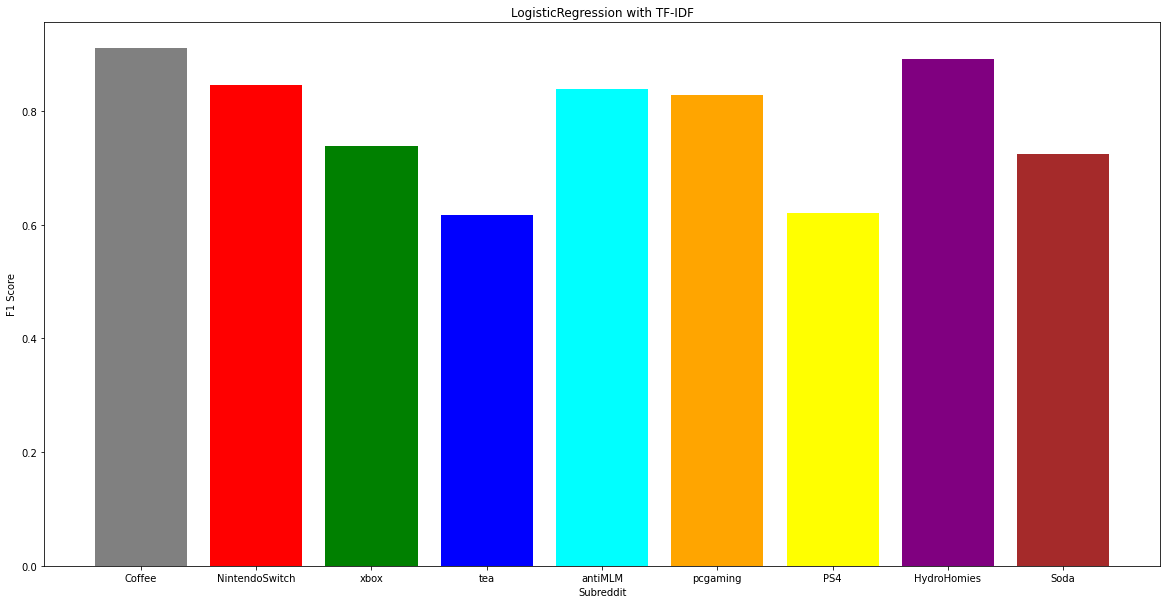

In [78]:
plt.figure(figsize=(20,10))
plt.bar(x=["Coffee", "NintendoSwitch", "xbox", "tea", "antiMLM", "pcgaming", "PS4", "HydroHomies", "Soda"], height=f1_df['LogisticRegression with TF-IDF vectorization'], color=['gray', 'red', 'green', 'blue', 'cyan','orange','yellow','purple','brown'])
plt.xlabel("Subreddit")
plt.ylabel("F1 Score")
plt.title("LogisticRegression with TF-IDF")

**Using Random Forest as a new classifier to compare its performance compared to previous classifiers**

In [79]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=1)
rf_model.fit(features_train, label_train)
print(rf_model.score(features_test, label_test))

random_forest_train = model_evaluation(model="Random Forest Classifier Train", true=label_train, predicted=rf_model.predict(features_train))
print("\n")
random_forest_test = model_evaluation(model="Random Forest Classifier Test", true=label_test, predicted=rf_model.predict(features_test))

0.7675

Model:  Random Forest Classifier Train
Precision = 1.000 	 Recall = 1.000 	 F1 score = 1.000
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 136}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 134}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 145}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 142}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 102}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 128}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 135}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 146}, '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 132}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1200}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1200}}



Confusion matrix:
 [[136   0   0   0   0   0   0   0  

In [80]:
f1_random_forest = {}
for i in random_forest_test[1]:
  if i == '0' or i == '1' or i == '2' or i == '3' or i == '4' or i == '5' or i == '6' or i == '7' or i == '8':
    f1_random_forest[i] = random_forest_test[1][i]['f1-score']

In [81]:
f1_df['Random Forest'] = f1_random_forest.values()
f1_df

,Dummy = Most Frequent,Dummy = Stratified,LogisticRegression with One-hot vectorization,LogisticRegression with TF-IDF vectorization,SVC,Random Forest
Coffee,0.000000,0.079208,0.909091,0.910714,0.831683,0.927273
NintendoSwitch,0.000000,0.071429,0.871795,0.845070,0.876712,0.847059
xbox,0.000000,0.115385,0.770833,0.738739,0.725490,0.729167
tea,0.000000,0.163265,0.634615,0.616822,0.496552,0.629630
antiMLM,0.000000,0.098361,0.718750,0.838710,0.753623,0.793103
pcgaming,0.000000,0.000000,0.776471,0.827586,0.595745,0.790698
PS4,0.000000,0.085106,0.602151,0.620690,0.434783,0.571429
HydroHomies,0.190045,0.111111,0.891566,0.891566,0.853333,0.928571
Soda,0.000000,0.170213,0.689655,0.725000,0.638889,0.696629


**Comparing the performance of Random Classifier with previous five classifiers on test set**

In [82]:
column = ["Accuracy", "Precision", "Recall", "F1-Score"]
row = ["Dummy = Most Frequent", "Dummy = Starified","LogisticRegression with One-hot vectorization","LogisticRegression with TF-IDF","SVC","Random Forest"]

In [83]:
f1_score = np.array([
                       mostfrequent_dummyprior_test[0], 
                       stratified_dummyprior_test[0],
                       logistic_reg_test[0],
                       logistic_reg_tfid_test[0],
                       svc_test[0],
                       random_forest_test[0]
                      ])

In [84]:
f1_score = pd.DataFrame(f1_score, columns=column, index=row)
f1_score

,Accuracy,Precision,Recall,F1-Score
Dummy = Most Frequent,0.1050,1.000000,0.1050,0.190045
Dummy = Starified,0.1025,0.108237,0.1025,0.105012
LogisticRegression with One-hot vectorization,0.7625,0.762904,0.7625,0.760794
LogisticRegression with TF-IDF,0.7750,0.779319,0.7750,0.774027
SVC,0.6775,0.715078,0.6775,0.670242
Random Forest,0.7675,0.777182,0.7675,0.768615


Text(0.5, 1.0, 'Random Forest')

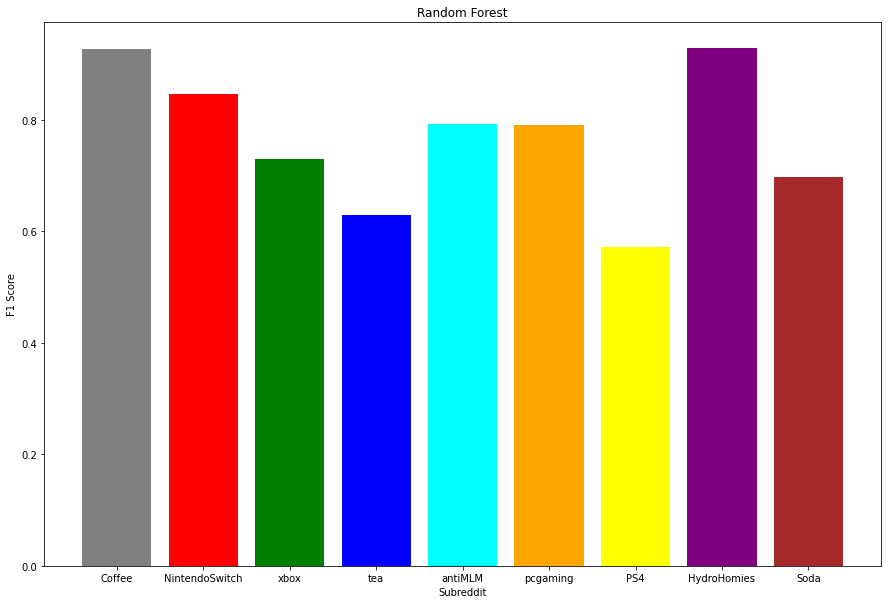

In [85]:
plt.figure(figsize=(15,10))
plt.bar(x=["Coffee", "NintendoSwitch", "xbox", "tea", "antiMLM", "pcgaming", "PS4", "HydroHomies", "Soda"], height=f1_df['Random Forest'], color=['gray', 'red', 'green', 'blue', 'cyan','orange','yellow','purple','brown'])
plt.xlabel("Subreddit")
plt.ylabel("F1 Score")
plt.title("Random Forest")

# **LogisticRegression with TF-IDF vectorization - Optimization**

**TF-IDF vectorization**

In [86]:
tfid = TfidfVectorizer(sublinear_tf=True, max_features=100)
validation_features_tfid2 = tfid.fit_transform(validation_data['body'])
test_features_tfid2 = tfid.transform(test_data['body'])

**Using GridSearchCV to find the best C value for this classifier**

In [87]:
parameters = {
    'Logistic Regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [0.01,0.1,1,10,100,1000,10000]
        }
    
            
        }
    }     

In [88]:
scores = []

for model_name, m in parameters.items():
    grid_cv =  GridSearchCV(m['model'], m['params'], cv=5, return_train_score=False)
    grid_cv.fit(validation_features_tfid2, label_validation)
    scores.append({
        'Model': model_name,
        'Best Score': grid_cv.best_score_,
        'Best Parameter': grid_cv.best_params_
    })

In [89]:
log_df = pd.DataFrame(scores,columns=['Model','Best Score','Best Parameter'])
log_df

,Model,Best Score,Best Parameter
0,Logistic Regression,0.535,{'C': 1}


In [90]:
logistic_reg_tfid2 = LogisticRegression(C=1)
logistic_reg_tfid2.fit(validation_features_tfid2, label_validation)

LogisticRegression(C=1)

In [91]:
logistic_reg_tfid2_validation = model_evaluation(model="Logistic regression TF-IDF vectorization", predicted=logistic_reg_tfid2.predict(validation_features_tfid2), true=label_validation)
print("\n")
logistic_reg_tfid2_test = model_evaluation(model="Logistic regression TF-IDF vectorization", predicted=logistic_reg_tfid2.predict(test_features_tfid2), true=label_test)


Model:  Logistic regression TF-IDF vectorization
Precision = 0.796 	 Recall = 0.782 	 F1 score = 0.784
{'0': {'precision': 0.8333333333333334, 'recall': 0.9210526315789473, 'f1-score': 0.875, 'support': 38}, '1': {'precision': 0.9210526315789473, 'recall': 0.9210526315789473, 'f1-score': 0.9210526315789473, 'support': 38}, '2': {'precision': 0.8461538461538461, 'recall': 0.8461538461538461, 'f1-score': 0.8461538461538461, 'support': 52}, '3': {'precision': 0.6511627906976745, 'recall': 0.6363636363636364, 'f1-score': 0.6436781609195402, 'support': 44}, '4': {'precision': 0.7441860465116279, 'recall': 0.6808510638297872, 'f1-score': 0.711111111111111, 'support': 47}, '5': {'precision': 0.9444444444444444, 'recall': 0.7183098591549296, 'f1-score': 0.816, 'support': 71}, '6': {'precision': 0.7209302325581395, 'recall': 0.7045454545454546, 'f1-score': 0.7126436781609196, 'support': 44}, '7': {'precision': 0.8333333333333334, 'recall': 1.0, 'f1-score': 0.9090909090909091, 'support': 40}, '

In [92]:
# Storing f1 scores for new optimized Logistic Regression with TF-IDF vectorization
f1_newlogreg = {}
for i in logistic_reg_tfid2_test[1]:
  if i == '0' or i == '1' or i == '2' or i == '3' or i == '4' or i == '5' or i == '6' or i == '7' or i == '8':
    f1_newlogreg[i] = logistic_reg_tfid2_test[1][i]['f1-score']

In [93]:
f1_df['Optimized- Logisitic Regression - TF-IDF'] = f1_newlogreg.values()
f1_df

,Dummy = Most Frequent,Dummy = Stratified,LogisticRegression with One-hot vectorization,LogisticRegression with TF-IDF vectorization,SVC,Random Forest,Optimized- Logisitic Regression - TF-IDF
Coffee,0.000000,0.079208,0.909091,0.910714,0.831683,0.927273,0.808081
NintendoSwitch,0.000000,0.071429,0.871795,0.845070,0.876712,0.847059,0.738462
xbox,0.000000,0.115385,0.770833,0.738739,0.725490,0.729167,0.581818
tea,0.000000,0.163265,0.634615,0.616822,0.496552,0.629630,0.360000
antiMLM,0.000000,0.098361,0.718750,0.838710,0.753623,0.793103,0.386364
pcgaming,0.000000,0.000000,0.776471,0.827586,0.595745,0.790698,0.604167
PS4,0.000000,0.085106,0.602151,0.620690,0.434783,0.571429,0.255319
HydroHomies,0.190045,0.111111,0.891566,0.891566,0.853333,0.928571,0.873563
Soda,0.000000,0.170213,0.689655,0.725000,0.638889,0.696629,0.163934


Text(0, 0.5, 'F1-Scores')

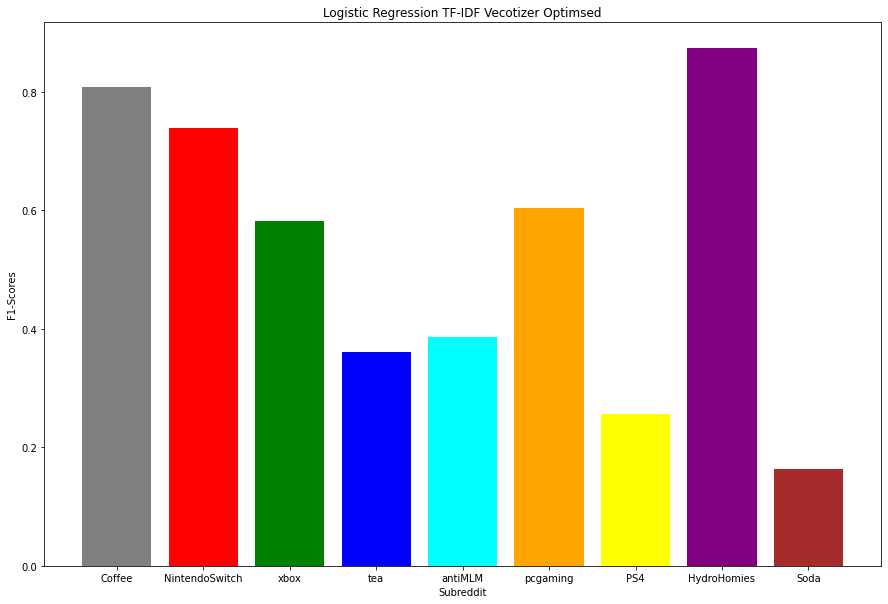

In [94]:
plt.figure(figsize=(15,10))
plt.bar(x=["Coffee", "NintendoSwitch", "xbox", "tea", "antiMLM", "pcgaming", "PS4", "HydroHomies", "Soda"], height=f1_df['Optimized- Logisitic Regression - TF-IDF'], color=['gray', 'red', 'green', 'blue', 'cyan','orange','yellow','purple','brown'])
plt.title("Logistic Regression TF-IDF Vecotizer Optimsed")
plt.xlabel("Subreddit")
plt.ylabel("F1-Scores")

# **Feature Engineering**

**Adding two features "title" and "score"**

In [95]:
# Function to get output using NLP for title feature
port_stem = PorterStemmer()
stop_words = stopwords.words('english')
def output_nlp(dataset):
  output = []
  for i in range(len(dataset)):
    words_norm = re.sub('[^a-zA-Z]', ' ', dataset.title[i])
    words_norm = words_norm.lower()
    words_norm = words_norm.split()
    words_norm = [port_stem.stem(word) for word in words_norm if not word in set(stop_words)]
    words_norm = ' '.join(words_norm)
    output.append(words_norm)

  return output

In [96]:
train_title = output_nlp(train_data)
validation_title= output_nlp(validation_data)
test_title = output_nlp(test_data)

In [97]:
data = [train_data["score"]]

headers = ["score"]

train_df1 = pd.concat(data, axis=1, keys=headers)

train_df1["title"]=train_title
train_df1["body"]=train_output

In [98]:
data = [validation_data["score"]]

headers = ["score"]

validation_df1 = pd.concat(data, axis=1, keys=headers)

validation_df1["title"]=validation_title
validation_df1["body"]=validation_output

In [99]:
data = [test_data["score"]]

headers = ["score"]

test_df1 = pd.concat(data, axis=1, keys=headers)

test_df1["title"]=test_title
test_df1["body"]=test_output

**Scaling score feature in the dataframe**

In [100]:

scaled = train_df1.copy()
column = ['score']
feature_train1 = scaled[column]
scaler = StandardScaler().fit(feature_train1.values)
features = scaler.transform(feature_train1.values)

train_df1["score_scaled"] = features
train_df1.drop(columns="score",axis=1,inplace=True)
train_df1

,title,body,score_scaled
0,get ban game buy librari,long stori short saw eso librari download let ...,-0.150941
1,get kinect sensor work pc,seen video onlin someon took kinect use contro...,-0.150941
2,switch charg gopro cabl,hi hope right place way post tri use portabl w...,-0.145721
3,l occitan go mlm rout,buy major share limelight alcon seem go mlm ro...,-0.135282
4,guy need help,ok drink coffe morn still drink good amount wa...,-0.148853
...,...,...,...
1195,debat get pc xbox seri x think seri x worth,question well seri x easili hit max frame seri...,-0.148853
1196,buy sever exot uniqu coffe,look onlin place offer less normal coffe speak...,-0.140501
1197,favorit non caffein tea,due medic reason current allow caffein tri fin...,-0.145721
1198,q pour method tri,hey recent year learn love coffe home usual dr...,-0.143633


In [101]:
scaled = validation_df1.copy()
column = ['score']
feature_validation1 = scaled[column]
scaler = StandardScaler().fit(feature_validation1.values)
features = scaler.transform(feature_validation1.values)

validation_df1["score_scaled"] = features
validation_df1.drop(columns="score",axis=1,inplace=True)
validation_df1

,title,body,score_scaled
0,reusabl nespresso pod,hey want go reusabl pod rout nespresso lattiss...,-0.173761
1,hydro news sad citi us michigan benton harbor ...,us news never reach us research water contamin...,-0.157983
2,find sprite zero sugar winter spice cranberri,sprite releas limit edit soda holiday season w...,-0.176916
3,lot tea loos bag would love gift someon anyon ...,long stori short mani tea home would love some...,-0.148516
4,rins bamboo filter pour,hard time find answer googl mostli bleach vs u...,-0.183228
...,...,...,...
395,preserv collect soda without explod leak,soda want keep leak ruin alot thing want know ...,-0.183228
396,american soda get,recent start sell american treat box post imgu...,-0.176916
397,refund bought gift card,wonder bought someth gift card refund go back ...,-0.173761
398,gta v instal crash,decid reinstal gta v cayo perico heist updat w...,-0.183228


In [102]:
scaled = test_df1.copy()
column = ['score']
feature_test1 = scaled[column]
scaler = StandardScaler().fit(feature_test1.values)
features = scaler.transform(feature_test1.values)

test_df1["score_scaled"] = features
test_df1.drop(columns="score",axis=1,inplace=True)
test_df1

,title,body,score_scaled
0,best indi coffe brand k cup,know biggest fan k cup right love get list bra...,-0.162232
1,decid keep play give game,know obviou answer give enjoy problem game esp...,0.005069
2,rel new xbox question,play infinit friend parti record gameplay watc...,-0.160894
3,best gyokuro vendor us,ive ever tri ippodo sinc us base distribut cen...,-0.155540
4,mari kay hun neighbor solicit sign front door,guess like bother peopl tri get buy stuff ironi,1.227040
...,...,...,...
395,blown away much better linux support gotten,post want make prais effort steam put linux ga...,0.041206
396,til use usb c headphon switch,train morn put huawei usb c headphon usb c por...,0.122850
397,shin megami tensei v dark soul pokemon jrpg,first smt game ever play blast remind feel pla...,-0.162232
398,game year futur opinion idea think becom realiti,urg creativ opinion long think fulli fledg vr ...,-0.115388


In [103]:
cv = CountVectorizer()

features_train = cv.fit_transform(train_output).toarray()
features_validation = cv.transform(validation_output).toarray()
features_test = cv.transform(test_output).toarray()
type(features_validation)

numpy.ndarray

In [104]:
validation_df1=pd.concat([validation_df1, pd.DataFrame(features_validation)], axis=1)
validation_df1.shape

(400, 6009)

In [105]:
title_train = cv.fit_transform(train_title).toarray()
title_validation = cv.transform(validation_title).toarray()
title_test = cv.transform(test_title).toarray()

In [106]:
validation_df1=pd.concat([validation_df1, pd.DataFrame(title_validation)], axis=1)
validation_df1.shape

(400, 8408)

In [107]:
validation_df1.drop(columns=["body","title"],axis=1,inplace=True)
validation_df1

,score_scaled,0,1,2,3,4,5,6,7,8,...,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398
0,-0.173761,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.157983,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.176916,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.148516,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.183228,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.183228,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,-0.176916,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,-0.173761,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,-0.183228,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
scores = []
parameters = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,100,200]
        }
    },
    'SVM': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'LogisticRegression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }   
}

In [109]:
for model_name, o in parameters.items():
    grid_cv =  GridSearchCV(o['model'], o['params'], cv=10, return_train_score=False)
    grid_cv.fit(validation_df1, label_validation)
    scores.append({
        'model': model_name,
        'best_score': grid_cv.best_score_,
        'best_params': grid_cv.best_params_
    })

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

In [110]:
new_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
new_df

,model,best_score,best_params
0,RandomForest,0.8075,{'n_estimators': 200}
1,SVM,0.7025,"{'C': 1, 'kernel': 'linear'}"
2,LogisticRegression,0.7650,{'C': 1}


**Random Forest is giving the best score value. By using the best parameters retrieved using GridSearchCV, the score value is calculated through Cross Validation CV**

In [111]:
train_df1=pd.concat([train_df1, pd.DataFrame(title_train)], axis=1)
train_df1=pd.concat([train_df1, pd.DataFrame(features_train)], axis=1)
train_df1.drop(columns=["body","title"],axis=1,inplace=True)

In [112]:
test_df1=pd.concat([test_df1, pd.DataFrame(title_test)], axis=1)
test_df1=pd.concat([test_df1, pd.DataFrame(features_test)], axis=1)
test_df1.drop(columns=["body","title"],axis=1,inplace=True)

In [113]:
score_RandomForest=cross_val_score(RandomForestClassifier(n_estimators=200),test_df1, label_test,cv=10)
score_RandomForest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

array([0.775, 0.825, 0.875, 0.775, 0.75 , 0.9  , 0.65 , 0.875, 0.75 ,
       0.85 ])

In [114]:
score_RandomForest=np.average(score_RandomForest)

In [115]:
score_RandomForest

0.8025

**Comparing score values of all the classifiers mentioned**

In [116]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(train_df1, label_train)
print(rf_model.score(test_df1, label_test))

random_forest_train1 = model_evaluation(model="Random Forest Classifier Train1", true=label_train, predicted=rf_model.predict(train_df1))
print("\n")
random_forest_test1 = model_evaluation(model="Random Forest Classifier Test1", true=label_test, predicted=rf_model.predict(test_df1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8325

Model:  Random Forest Classifier Train1
Precision = 1.000 	 Recall = 1.000 	 F1 score = 1.000
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 136}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 134}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 145}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 142}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 102}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 128}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 135}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 146}, '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 132}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1200}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1200}}



Confusion matrix:
 [[136   0   0   0   0   0   0   0 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [117]:
column = ["Accuracy", "Precision", "Recall", "F1-Score"]
row = ["Dummy = Most Frequent", "Dummy = Starified","LogisticRegression with One-hot vectorization","LogisticRegression with TF-IDF","SVC","Random Forest","Optimized- Logisitic Regression - TF-IDF", "Random Forest-Feature Engineering"]

In [118]:
final_score = np.array([
                       mostfrequent_dummyprior_test[0], 
                       stratified_dummyprior_test[0],
                       logistic_reg_test[0],
                       logistic_reg_tfid_test[0],
                       svc_test[0],
                       random_forest_test[0],
                       logistic_reg_tfid2_test[0],
                       random_forest_test1[0]
                      ])

In [119]:
final_result = pd.DataFrame(final_score, columns=column, index=row)
final_result

,Accuracy,Precision,Recall,F1-Score
Dummy = Most Frequent,0.1050,1.000000,0.1050,0.190045
Dummy = Starified,0.1025,0.108237,0.1025,0.105012
LogisticRegression with One-hot vectorization,0.7625,0.762904,0.7625,0.760794
LogisticRegression with TF-IDF,0.7750,0.779319,0.7750,0.774027
SVC,0.6775,0.715078,0.6775,0.670242
Random Forest,0.7675,0.777182,0.7675,0.768615
Optimized- Logisitic Regression - TF-IDF,0.5375,0.566161,0.5375,0.538652
Random Forest-Feature Engineering,0.8325,0.850311,0.8325,0.828028
